# Workshop Task - Training models and preprocessing


We have classification problem where we have to predict whether a credit would be approved or not for a client.


|Field Name|	Order|	Type (Format)|Description|
| -------| -------|-----------|---------|
|checking_status|	1|	string (default)|Status of existing checking account, in Deutsche Mark.|
|duration	|2|	number (default)	|Duration in months|
|credit_history	|3|	string (default)	|Credit history (credits taken, paid back duly, delays, critical accounts)|
|purpose	|4|	string (default)	|Purpose of the credit (car, television,…)|
|credit_amount	|5|	number (default)	|Credit amount|
|savings_status	|6|	string (default)	|Status of savings account/bonds, in Deutsche Mark.|
|employment	|7|	string (default)	|Present employment, in number of years.|
|installment_commitment	|8|	number (default)|Installment rate in percentage of disposable income|
|personal_status	|9|	string (default)|Personal status (married, single,…) and sex|
|other_parties	|10|	string (default)|Other debtors / guarantors|
|residence_since	|11|	number (default)|Present residence since X years|
|property_magnitude	|12|	string (default)|Property (e.g. real estate)|
|age	|13|	number (default)	|Age in years|
|other_payment_plans	|14|	string (default)|Other installment plans (banks, stores)|
|housing	|15|	string (default)	|Housing (rent, own,…)|
|existing_credits	|16|	number (default)|Number of existing credits at this bank|
|job	|17|	string (default)	|Job|
|num_dependents	|18|	number (default)|Number of people being liable to provide maintenance for|
|own_telephone	|19|	string (default)|Telephone (yes,no)|
|foreign_worker	|20|	string (default)|Foreign worker (yes,no)|
accepted	|21|	string (default)	|Class|


Your task is to :
  1. Train a Baseline Model
  2. Exploratory Data Analysis: through looking at data values, unique values and with Visualizations
  3. Fill Missing Data, Do simple encodings (one-hot, label), Scale Numeric variables
  4. Build a new model and observe whether you have improvement.
  5. Try to do more complicated feature engineering: fix categorical features which might have problems, apply transformation to skewed features, create new features if possible.
  6. Feature Selection
  7. Build the final model with default parameters and observe your score.


----------------------------
Use a Decision Tree or kNN as your baseline model, then Random Forest for your other models, a Train-Test split of 70%-30%, and a random_state=42



In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('dataset.csv', delimiter = ";")

In [3]:
dataset.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,NaN,...,real_estate,NaN,none,own,2.0,skilled_employee/official,1.0,yes,yes,0
1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,NaN,...,real_estate,22.0,none,own,1.0,skilled_employee/official,1.0,none,yes,1
2,NaN,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,NaN,...,real_estate,49.0,none,own,1.0,unskilled_resident,2.0,none,yes,0
3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1.0,skilled_employee/official,2.0,none,yes,0
4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,NaN,...,unknown/no_property,53.0,none,for_free,2.0,skilled_employee/official,2.0,none,yes,1
5,NaN,36,Existing_credits_paid_till_now,education,1227.203916,Unknown_or_no_savings_acct,1_to_4yrs,2,male_single,NaN,...,unknown/no_property,35.0,none,for_free,1.0,unskilled_resident,2.0,yes,yes,0
6,NaN,24,Existing_credits_paid_till_now,furniture/equipment,1985.000000,500_to_1000DM,>7yrs,3,male_single,NaN,...,building_society_savings_agreement/life_insurance,53.0,none,own,1.0,skilled_employee/official,1.0,none,yes,0
7,from_0_to_200,36,NaN,used_car,2809.000000,<100DM,1_to_4yrs,2,male_single,NaN,...,car_or_other_nonsavings,35.0,none,rent,1.0,management_self-employed_highly_qualified/officer,1.0,yes,yes,0
8,NaN,12,Existing_credits_paid_till_now,radio/television,2484.663607,>1000DM,4_to_7yrs,2,male_divorced/separated,NaN,...,real_estate,61.0,none,own,1.0,unskilled_resident,1.0,none,yes,0
9,from_0_to_200,30,Critical_acct_other_credits_existing,new_car,16324.000000,<100DM,unemployed,4,male_married/widowed,NaN,...,car_or_other_nonsavings,28.0,none,own,2.0,management_self-employed_highly_qualified/officer,1.0,none,yes,1


In [4]:
dataset.describe()

,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,accepted
count,1001.000000,1003.000000,1002.000000,953.000000,1002.000000,1001.000000,1003.000000
mean,4506.621158,2.973081,2.844311,35.579224,1.407186,1.154845,0.299103
std,3659.433681,1.117933,1.102949,11.347096,0.577525,0.361938,0.458093
min,505.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,1918.647254,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,3672.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,5899.631666,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,27389.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [5]:
dataset.isna().sum()

,0
checking_status,394
duration,54
credit_history,53
purpose,3
credit_amount,2
savings_status,5
employment,2
installment_commitment,0
personal_status,5
other_parties,910


###Baseline: Desicion Tree

In [6]:
X = dataset.drop('accepted', axis=1)
y = dataset['accepted'].astype(int)

In [7]:
#for simplicity of the baseline model encode at once before splitting
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Decision Tree Baseline Accuracy: {acc:.4f}")
print(f"Decision Tree Baseline F1 Score: {f1:.4f}")

Decision Tree Baseline Accuracy: 0.9037
Decision Tree Baseline F1 Score: 0.8263


###EDA

In [10]:
print(X.shape)
print(X.dtypes)
print(X.isnull().sum())
print(X.describe())

(1003, 20)
checking_status             int64
duration                    int64
credit_history              int64
purpose                     int64
credit_amount             float64
savings_status              int64
employment                  int64
installment_commitment      int64
personal_status             int64
other_parties               int64
residence_since           float64
property_magnitude          int64
age                       float64
other_payment_plans         int64
housing                     int64
existing_credits          float64
job                         int64
num_dependents            float64
own_telephone               int64
foreign_worker              int64
dtype: object
checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              2
savings_status             0
employment                 0
installment_commitment     0
personal_status            0
other_parties              0
resid

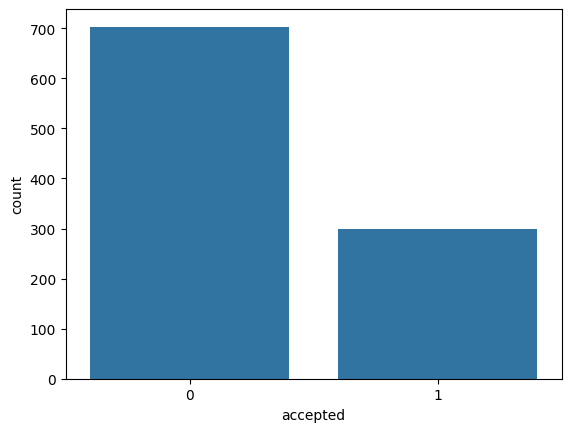

In [11]:
#target variable distribution
sns.countplot(x=y)
plt.show()

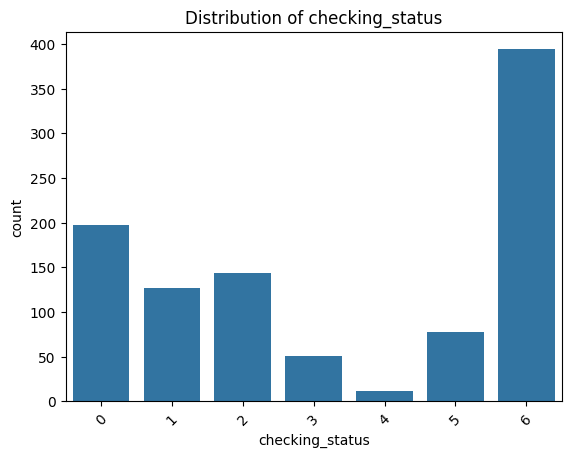

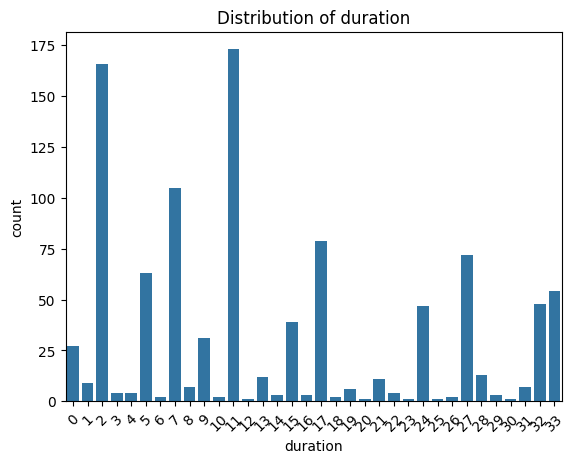

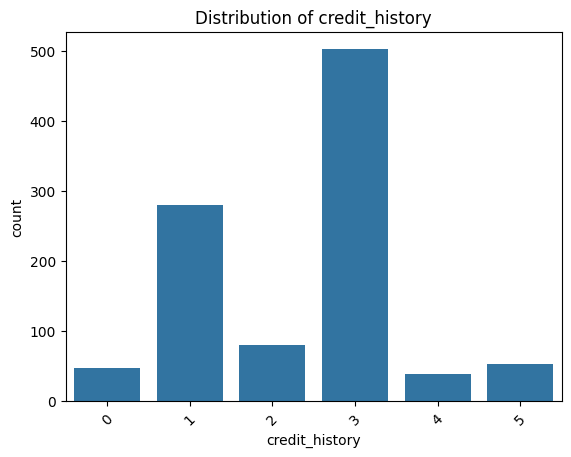

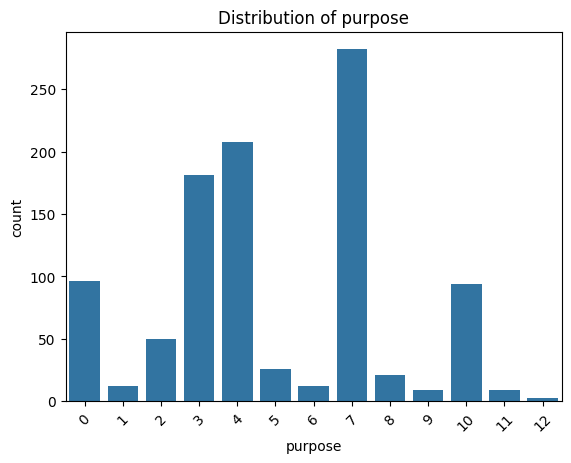

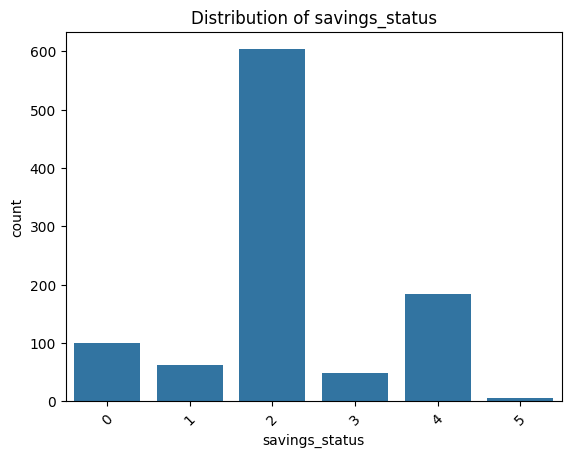

In [12]:
#categortical features distribution
categorical_cols = X.select_dtypes(include='int64').columns

for col in categorical_cols[:5]:
    sns.countplot(x=X[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

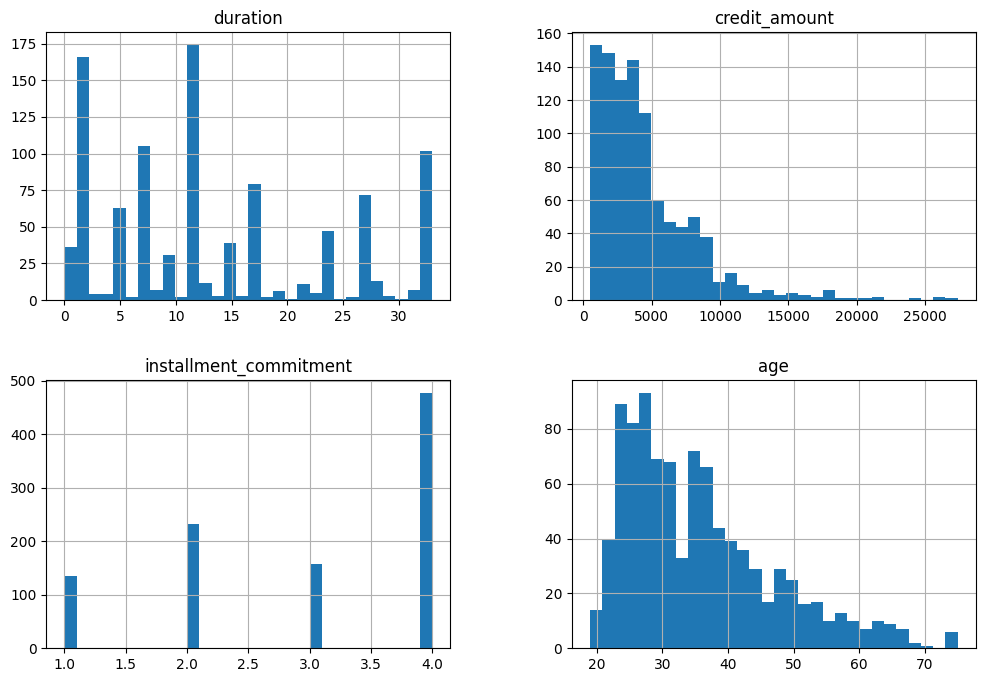

In [13]:
#numeric features distribution
numeric_cols = ['duration', 'credit_amount', 'installment_commitment', 'age']

X[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.show()

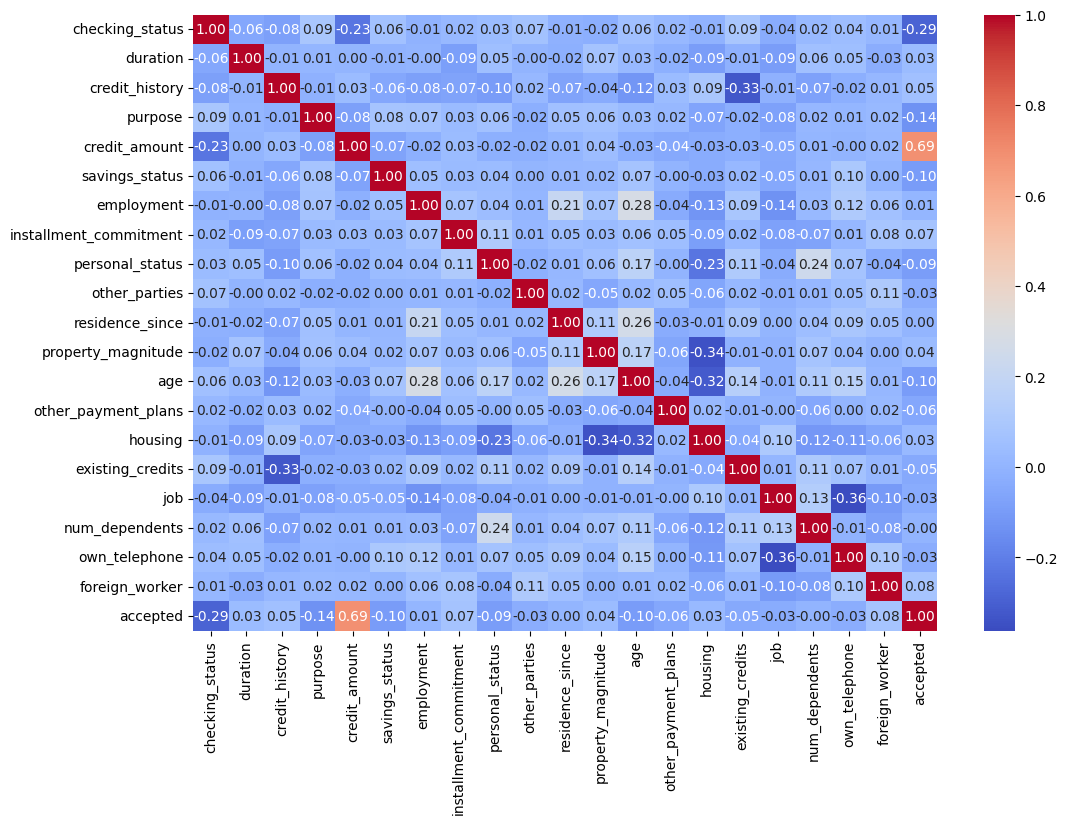

In [14]:
#correlation heatmap
df_encoded = X.copy()
df_encoded['accepted'] = y

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

###Fill mising data, encodings

In [15]:
print(X.isnull().sum())

checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              2
savings_status             0
employment                 0
installment_commitment     0
personal_status            0
other_parties              0
residence_since            1
property_magnitude         0
age                       50
other_payment_plans        0
housing                    0
existing_credits           1
job                        0
num_dependents             2
own_telephone              0
foreign_worker             0
dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

#fill numeric columns with the mean
for col in num_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean().round())
    X_test[col] = X_test[col].fillna(X_test[col].mean().round())

#fill categorical columns with the most frequent value
for col in cat_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])


In [18]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

###Build new model

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Accuracy: {acc:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.9535
Random Forest F1 Score: 0.9176
[[209   8]
 [  6  78]]


###Feature engineering

In [20]:
#grouping rare categories into 'Other'
X_train['checking_status'] = X_train['checking_status'].replace(
    ['0_checking', 'from_0_to_200', 'NaN'], 'Other')
X_test['checking_status'] = X_test['checking_status'].replace(
    ['0_checking', 'from_0_to_200', 'NaN'], 'Other')

#transformation for skewed numeric features
X_train['credit_amount'] = X_train['credit_amount'].apply(lambda x: np.log(x+1) if x > 0 else x) #apply only on positive numbers
X_test['credit_amount'] = X_test['credit_amount'].apply(lambda x: np.log(x+1) if x > 0 else x)

#create new features
X_train['credit_income_ratio'] = X_train['credit_amount'] / X_train['installment_commitment']
X_test['credit_income_ratio'] = X_test['credit_amount'] / X_test['installment_commitment']

###Feature selection

In [21]:
#fit a random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

#select top features based on importance
top_features = feature_importances.head(10).index

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

###Final model

In [22]:
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(X_train_selected, y_train)

y_pred_final = rf_final.predict(X_test_selected)
acc = accuracy_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"Random Forest Accuracy: {acc:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

Random Forest Accuracy: 0.9535
Random Forest F1 Score: 0.9176
[[209   8]
 [  6  78]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       217
           1       0.91      0.93      0.92        84

    accuracy                           0.95       301
   macro avg       0.94      0.95      0.94       301
weighted avg       0.95      0.95      0.95       301



In [23]:
#cross validation check
cv_scores = cross_val_score(rf_final, X_train_selected, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

print(f"Cross Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross Validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Cross Validation Accuracy: {np.std(cv_scores):.4f}")

Cross Validation Accuracy Scores: [0.93617021 0.94326241 0.95       0.97857143 0.98571429]
Mean Cross Validation Accuracy: 0.9587
Standard Deviation of Cross Validation Accuracy: 0.0197
